# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
import numpy as np
import pandas as pd
import random
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr
from collections import Counter

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
# your answer here
temp = pd.read_csv("../your-code/Temp_States.csv")

#### Print `temp`

In [7]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [13]:
# your answer here
checking_types = temp.dtypes
checking_types

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [16]:
# your answer here
only_nyc = temp.loc[temp['State'] == "New York"]
only_nyc

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [21]:
# your answer here

nyc_mean_temp = only_nyc["Temperature"].mean()
round(nyc_mean_temp,1)

10.7

#### We want to know cities and states with Temperature above 15 degress Celcius

In [22]:
# your answer here
above_fifteen = temp.loc[(temp['Temperature'] > 15)]
above_fifteen

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [23]:
# your answer here
above_fifteen = temp.loc[(temp['Temperature'] > 15)]
above_fifteen["City"]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [24]:
# your answer here
between_fifteen_twenty = temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
between_fifteen_twenty["City"]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [33]:
# your answer here
my_data = temp.groupby("State").mean()
my_data

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [34]:
my_data = temp.groupby("State").std()
my_data

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [35]:
# your answer here
employee = pd.read_csv("../your-code/employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [36]:
# your answer here - There are only 2 numerical columns and the rest are strings (objects)
checking_types2 = employee.dtypes
checking_types2

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>]], dtype=object)

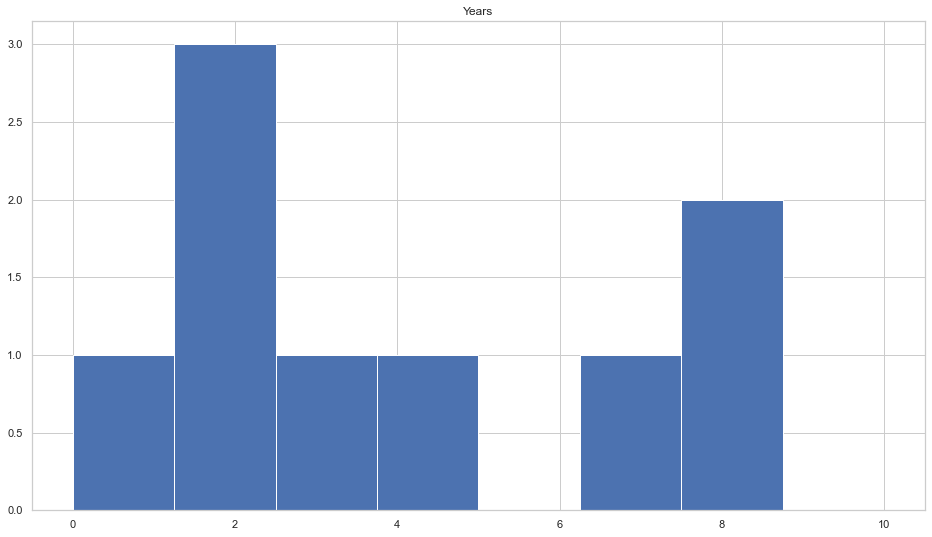

In [40]:
# your answer here
employee.hist("Years", bins=np.linspace(0,10,9))

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

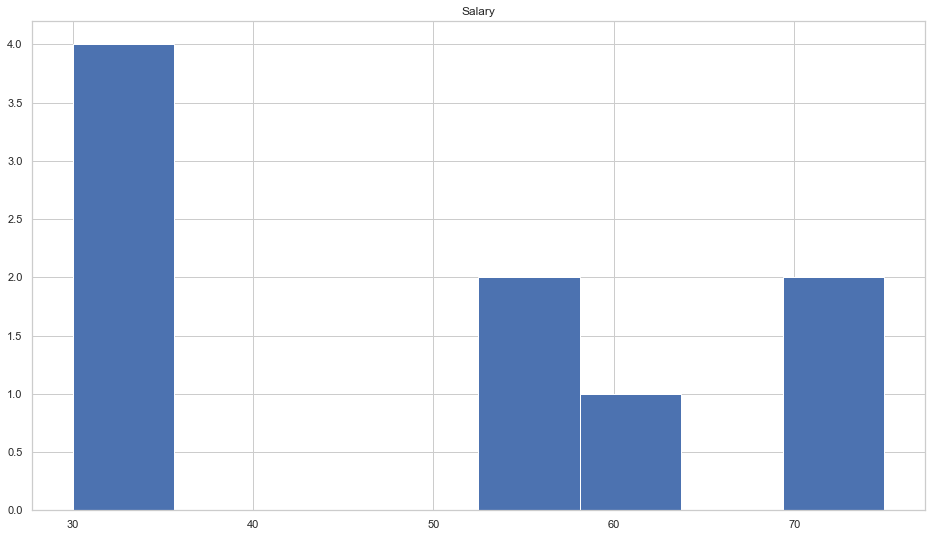

In [45]:
employee.hist("Salary", bins=np.linspace(30,75,9))

#### What's the average salary in this company?

In [47]:
# your answer here
avg_salary = employee["Salary"].mean()
round(avg_salary,1)

48.9

#### What's the highest salary?

In [48]:
# your answer here
max_salary = employee["Salary"].max()
max_salary

70

#### What's the lowest salary?

In [49]:
# your answer here
min_salary = employee["Salary"].min()
min_salary

30

#### Who are the employees with the lowest salary?

In [52]:
# your answer here
people_lowest = employee[employee['Salary'] == employee['Salary'].min()]
people_lowest


,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [53]:
# your answer here
only_david = employee[employee['Name'] == "David"]
only_david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [57]:
# your answer here
only_david["Salary"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [58]:
# your answer here
only_associates = employee[employee['Title'] == "associate"]
only_associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [60]:
# your answer here- 1 method
first_three = employee.head(3)
first_three

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [62]:
# your answer here- 2nd method
first_three2 = employee[:3]
first_three2

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [63]:
# your answer here
a_few_associates = employee.loc[(employee['Title'] == "associate") & (employee['Salary'] > 55)]
a_few_associates

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [67]:
# your answer here
avg_salary_by_years = round(employee.groupby("Years").mean(),1)
avg_salary_by_years

,Salary
Years,
1,35.0
2,38.3
3,55.0
4,35.0
7,60.0
8,70.0


####  What is the average Salary per title?

In [71]:
# your answer here
avg_salary_by_title = round(employee.groupby("Title").mean(),1)
avg_salary_by_title

,Years,Salary
Title,,
VP,8.0,70.0
analyst,2.2,32.5
associate,4.0,56.7


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

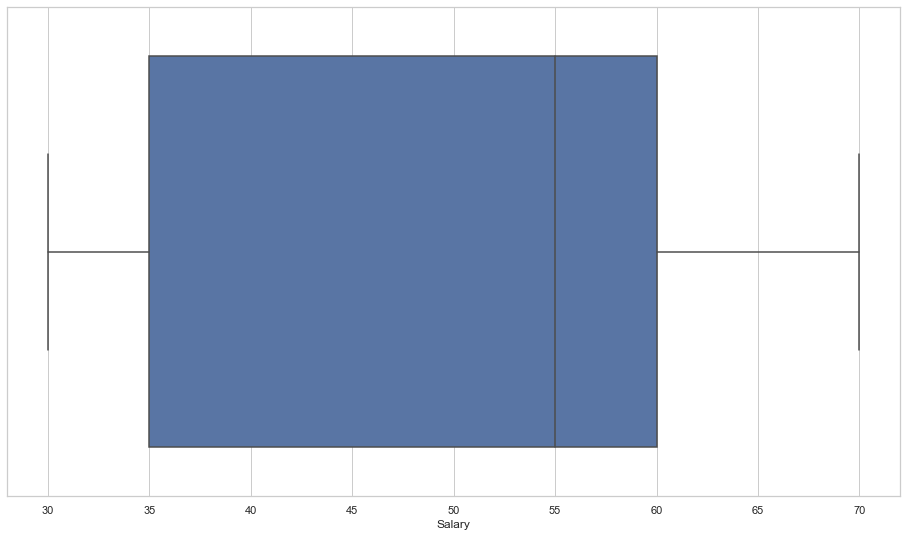

In [72]:
# draw boxplot here
sns.boxplot(x="Salary", data=employee);

In [73]:
# print first quartile here
employee.Salary.quantile(.25)

35.0

In [74]:
# print third quartile here
employee.Salary.quantile(.75)

60.0

#### Is the mean salary per gender different?

In [75]:
# your answer here
avg_salary_by_gender = round(employee.groupby("Gender").mean(),1)
avg_salary_by_gender

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [78]:
# your answer here
main_statistics = employee.groupby("Department").describe()
main_statistics

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [169]:
employee_difference = employee.groupby('Department')[['Salary']].apply(lambda g: g.max() - g.min())
employee_difference

,Salary
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [104]:
# your answer here
orders = pd.read_csv("../your-code/Orders.csv", index_col=0,encoding = 'unicode_escape')
orders

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [105]:
# your answer here - Most of the data type are numerical and only 4 columns having strings (objects)
checking_type = orders.dtypes
checking_type

InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [107]:
# your answer here - Describing some of the statistics for some columns such as InvoiceNo or CustomerID doesn't make sense as they are not actual numbers as such, it's just the individual numerical descriptor for each row
summary_statistics = round(orders.describe(),1)
summary_statistics

,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.0,397924.0,397924.0,397924.0,397924.0,397924.0,397924.0,397924.0,397924.0
mean,560617.1,2010.9,7.6,3.6,12.7,13.0,3.1,15294.3,22.4
std,13106.2,0.2,3.4,1.9,2.3,180.4,22.1,1713.2,309.1
min,536365.0,2010.0,1.0,1.0,6.0,1.0,0.0,12346.0,0.0
25%,549234.0,2011.0,5.0,2.0,11.0,2.0,1.2,13969.0,4.7
50%,561893.0,2011.0,8.0,3.0,13.0,6.0,2.0,15159.0,11.8
75%,572090.0,2011.0,11.0,5.0,14.0,12.0,3.8,16795.0,19.8
max,581587.0,2011.0,12.0,7.0,20.0,80995.0,8142.8,18287.0,168469.6


####  What is the average Purchase Price?

In [ ]:
# your answer here
# It is 3.1 (refer to previous question for reference)

In [110]:
average_price = round(orders["UnitPrice"].mean(),1)
average_price

3.1

#### What were the highest and lowest purchase prices? 

In [111]:
# your answer here
max_price = round(orders["UnitPrice"].max(),1)
max_price

8142.8

In [112]:
# your answer here
min_price = round(orders["UnitPrice"].min(),1)
min_price

0.0

#### Select all the customers we have in Spain

In [113]:
# your answer here
only_spanish_customers = orders.loc[(orders['Country'] == "Spain")]
only_spanish_customers

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [116]:
# your answer here
only_spanish_customers["Country"].value_counts()

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [121]:
# your answer here
only_more_than_fifty = orders.loc[(orders['Quantity'] > 50)]
only_more_than_fifty[:10]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
177,536386,85099B,2010,12,3,9,jumbo bag red retrospot,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
178,536387,79321,2010,12,3,9,chilli lights,192,2010-12-01 09:58:00,3.82,16029,United Kingdom,733.44
179,536387,22780,2010,12,3,9,light garland butterfiles pink,192,2010-12-01 09:58:00,3.37,16029,United Kingdom,647.04
180,536387,22779,2010,12,3,9,wooden owls light garland,192,2010-12-01 09:58:00,3.37,16029,United Kingdom,647.04
181,536387,22466,2010,12,3,9,fairy tale cottage nightlight,432,2010-12-01 09:58:00,1.45,16029,United Kingdom,626.40


In [122]:
len(only_more_than_fifty)

11609

#### Select orders from Spain that are above 50 items

In [119]:
# your answer here
only_more_than_fifty_spain = orders.loc[(orders['Quantity'] > 50) & (orders['Country'] == "Spain")]
only_more_than_fifty_spain[:10]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


In [120]:
len(only_more_than_fifty_spain)

39

#### Select all free orders

In [125]:
# your answer here
free_orders = orders.loc[(orders['amount_spent'] == 0)]
free_orders[:10]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


In [126]:
len(free_orders)

40

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [128]:
import re

In [132]:
# your answer here
lunch_bags = orders.loc[(orders['Description'].str.contains("lunch bag"))]
lunch_bags[:10]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
370,536401,20726,2010,12,3,11,lunch bag woodland,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
371,536401,22384,2010,12,3,11,lunch bag pink polkadot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
411,536404,22383,2010,12,3,11,lunch bag suki design,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
412,536404,20728,2010,12,3,11,lunch bag cars blue,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
413,536404,20727,2010,12,3,11,lunch bag black skull.,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50


In [133]:
len(lunch_bags)

11556

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [134]:
# your answer here
lunch_bags_one_year = orders.loc[(orders['Description'].str.contains("lunch bag")) & (orders["year"] == 2011)]
lunch_bags_one_year[:10]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
43617,540098,22383,2011,1,2,15,lunch bag suki design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
43618,540098,22382,2011,1,2,15,lunch bag spaceboy design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
43619,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
43620,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
43658,540099,20725,2011,1,2,16,lunch bag red retrospot,10,2011-01-04 16:41:00,1.65,15808,United Kingdom,16.50


In [135]:
len(lunch_bags_one_year)

11234

#### Show the frequency distribution of the amount spent in Spain.

array([[<AxesSubplot:title={'center':'amount_spent'}>]], dtype=object)

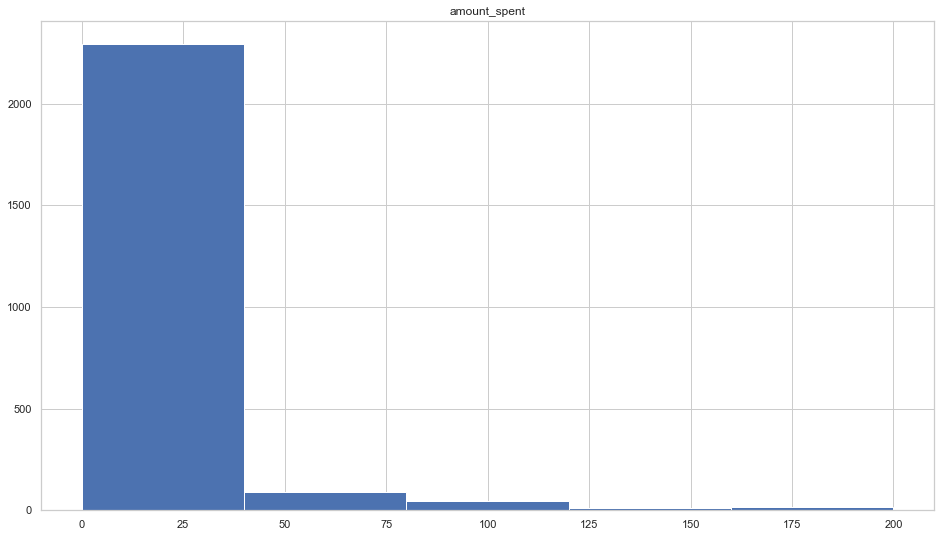

In [139]:
# your answer here
only_spanish_customers
only_spanish_customers.hist("amount_spent", bins=np.linspace(0,200,6))

#### Select all orders made in the month of August

In [140]:
# your answer here
only_august = orders.loc[(orders['month'] == 8)]
only_august[:10]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
285426,561905,84978,2011,8,1,9,hanging heart jar t-light holder,12,2011-08-01 09:31:00,1.25,14947,United Kingdom,15.00
285427,561905,21754,2011,8,1,9,home building block word,3,2011-08-01 09:31:00,5.95,14947,United Kingdom,17.85
285428,561905,23226,2011,8,1,9,filigree heart daisy white,24,2011-08-01 09:31:00,1.25,14947,United Kingdom,30.00
285429,561905,21715,2011,8,1,9,girls vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40
285430,561905,21716,2011,8,1,9,boys vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40


In [141]:
len(only_august)

27013

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [156]:
# your answer here - I got it, but haven't managed to find the way to remove one of the Country columns
only_august_by_country = only_august.groupby(["Country"])["Country"].value_counts()
only_august_by_country

Country          Country        
Australia        Australia            107
Austria          Austria               88
Belgium          Belgium              194
Canada           Canada                 5
Channel Islands  Channel Islands      140
Denmark          Denmark               16
EIRE             EIRE                 593
Finland          Finland               61
France           France               569
Germany          Germany              795
Iceland          Iceland               22
Israel           Israel               171
Italy            Italy                 95
Malta            Malta                 55
Netherlands      Netherlands          280
Norway           Norway                77
Poland           Poland                17
Portugal         Portugal              41
Spain            Spain                252
Sweden           Sweden                40
Switzerland      Switzerland          267
United Kingdom   United Kingdom     23105
Unspecified      Unspecified           23
N

#### What's the  average amount of money spent by country

In [162]:
# your answer here
average_spent_per_country = orders.groupby(["Country"])["amount_spent"].mean()
average_spent_per_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [166]:
expensive = orders.loc[(orders['UnitPrice'] == orders["UnitPrice"].max())]
expensive

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [173]:
# your answer here
average_spent_per_year = orders.groupby(["year"])["amount_spent"].mean()
average_spent_per_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64